# **Day88 Assignment-2:** How to get best parameters of each model, write in the for loop among the code, how to get best model out of it?

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# import regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV

# import preprocessors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# To remove warnings from output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = sns.load_dataset('dots')

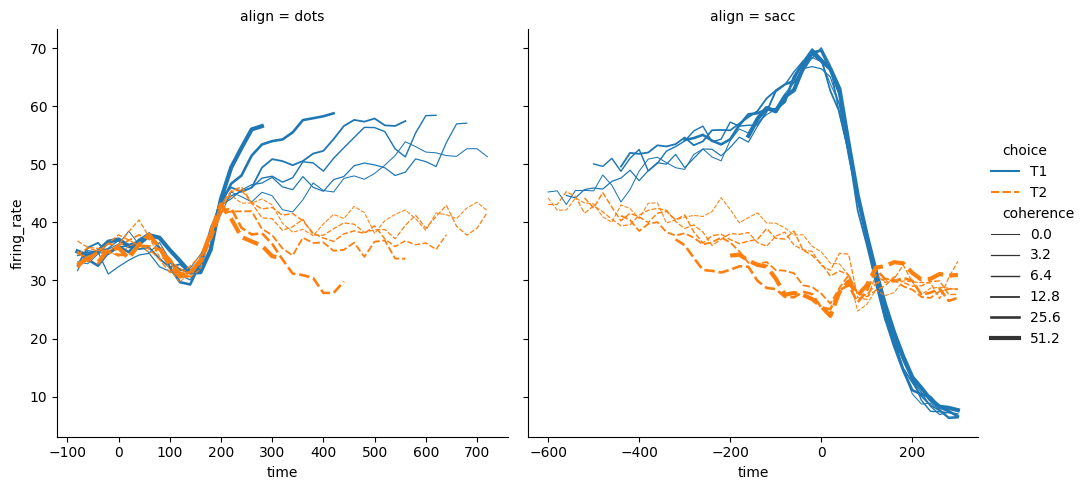

In [3]:
# visualize the dataset
sns.relplot(
    data=df, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [4]:
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [5]:
df.columns

Index(['align', 'choice', 'time', 'coherence', 'firing_rate'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.3+ KB


In [14]:
df['choice'].unique()

array(['T1', 'T2'], dtype=object)

## Rergression Tasks

In [8]:
# select features and variables
X = df.drop('firing_rate', axis=1)
y = df['firing_rate']

# label encode categorical variables
le = LabelEncoder()
X['align'] = le.fit_transform(X['align'])
X['choice'] = le.fit_transform(X['choice'])

# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


## Hyperparameter tuning **`Solution`** through *for loop*

In [ ]:
# Create a dictionary of models with hyperparameters to evaluate
models = {
    'LinearRegression': (LinearRegression(), {}),
    'SVR': (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1], 'gamma': [1, 0.1], 'epsilon': [0.1, 0.01]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 100], 'max_depth': [None, 5, 10]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'loss': ['ls', 'lad', 'huber', 'quantile'], 'n_estimators': [10, 100, 1000]}),
    'XGBRegressor': (XGBRegressor(), {'n_estimators': [10, 100], 'learning_rate': [0.1, 0.01]}),
}

# Initialize variables to track the best model and its performance
best_model = None
best_mse = float('inf')
best_r2 = -float('inf')
best_mae = float('inf')
# float('inf') is used here because the code is initializing best_mse to a value that is guaranteed to be larger than any other real number.

# Iterate over each model, train, predict, and evaluate performance metrics
for name, (model, params) in models.items():
    # Create a pipeline with the model
    pipeline = GridSearchCV(model, params, cv=5) # 5-fold cross-validation
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print the performance metrics
    print(name, 'MSE:', mse)
    print(name, 'R2:', r2)
    print(name, 'MAE:', mae)
    print()
    
    # Check if this model has better performance
    if mse < best_mse:
        best_model = pipeline
        best_mse = mse
        best_r2 = r2
        best_mae = mae

# Print the best model's performance metrics
print('Best Model:', best_model.best_estimator_)
print('Best MSE:', best_mse)
print('Best R2:', best_r2)
print('Best MAE:', best_mae)


LinearRegression MSE: 0.6948129686287711
LinearRegression R2: 0.4441368826121931
LinearRegression MAE: 0.6703807496461157

SVR MSE: 0.795653498186258
SVR R2: 0.3634626096067757
SVR MAE: 0.6669221028004211

DecisionTreeRegressor MSE: 0.987431694689693
DecisionTreeRegressor R2: 0.21003653529818433
DecisionTreeRegressor MAE: 0.7347691165599329

RandomForestRegressor MSE: 0.911224685109292
RandomForestRegressor R2: 0.27100354055682807
RandomForestRegressor MAE: 0.7463857608727101

KNeighborsRegressor MSE: 0.6437675304097399
KNeighborsRegressor R2: 0.4849741693324664
KNeighborsRegressor MAE: 0.6385880398456918



/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/sklearn/base.py",

GradientBoostingRegressor MSE: 0.7916520563916473
GradientBoostingRegressor R2: 0.3666638364266893
GradientBoostingRegressor MAE: 0.7142653506730012

XGBRegressor MSE: 0.8677490675057522
XGBRegressor R2: 0.30578483195839323
XGBRegressor MAE: 0.7584847906657628

Best Model: KNeighborsRegressor(n_neighbors=21, weights='distance')
Best MSE: 0.6437675304097399
Best R2: 0.4849741693324664
Best MAE: 0.6385880398456918
